In [33]:
import os
import numpy as np
from scipy import integrate
import sys
sys.path.append('../../scripts/')

import matplotlib.pyplot as plt
import mpl_stylesheet
mpl_stylesheet.banskt_presentation(fontfamily = 'latex-clearsans', fontsize = 24, colors = 'banskt')

In [34]:
simdir = '10414_450_10_800_30_100_100_0.01_0.5_0.0_0.6_0.6_4.0_0.1_20_0.02'
srcdir = '/scratch/sbanerj/trans-eqtl/simulation'

In [39]:
auclist = list()
roclist = list()

outfile = os.path.join(srcdir, simdir, 'rocdata/tejaas_permnull_kf0.95_knn_raw_peer0_fpr_tpr.txt')
roc = np.loadtxt(outfile, skiprows=1)
roclist.append(roc)
auc = integrate.simps(roc[:, 1], roc[:, 0])
auclist.append(auc)

outfile = os.path.join(srcdir, simdir, 'rocdata/tejaas_permnull_sb0.1_knn_raw_peer0_fpr_tpr.txt')
#outfile = os.path.join(srcdir, simdir, 'rocdata/tejaas_rand_permnull_kf0.9_knn_raw_peer0_fpr_tpr.txt')
roc = np.loadtxt(outfile, skiprows=1)
roclist.append(roc)
auc = integrate.simps(roc[:, 1], roc[:, 0])
auclist.append(auc)

mlabels = ['Keff/K = 0.95', 'sigma_beta = 0.1']

In [40]:
def zoomplot(ax, xx, yy, label, zoom = 1, yerr = None, color = None):
    nx = len(xx)
    nplot = int(nx * zoom)
    p = ax.plot(xx[:nplot], yy[:nplot], label = label, color = color)
    return p[0].get_color()

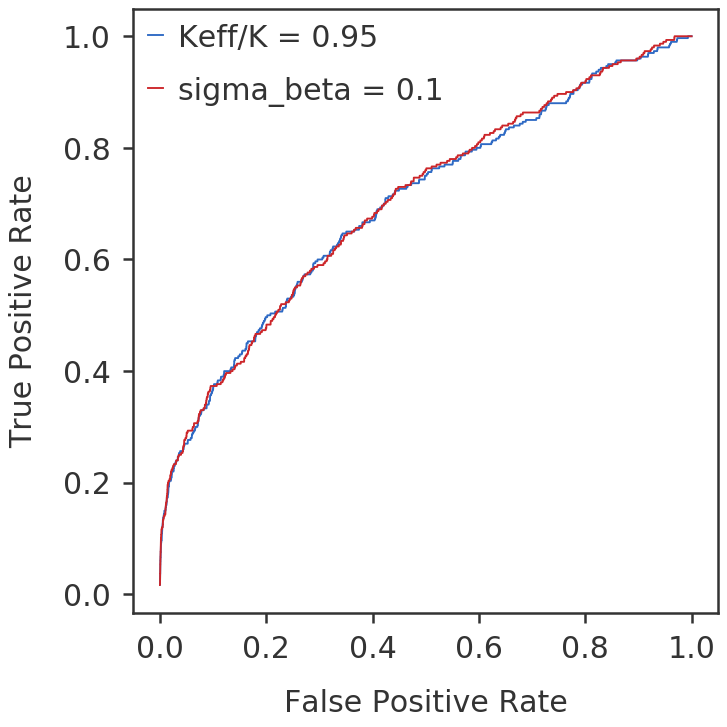

In [41]:
fig = plt.figure(figsize = (8, 8))
ax1 = fig.add_subplot(111)#, aspect='equal')

mcolors = list()
for i in range(2):
    roc = roclist[i]
    color = zoomplot(ax1, roc[:, 0], roc[:, 1], mlabels[i], zoom = 1.0, yerr = roc[:, 2])
    mcolors.append(color)

ax1.legend()
plt.tight_layout()
ax1.set_xlabel("False Positive Rate")
ax1.set_ylabel("True Positive Rate")
# plt.savefig('../plots/sigbeta_450sample_150tf_mean04_gtex_ms_correlation.png', bbox_inches='tight')
plt.show()